## Обзор данных

Начнем исследование с общего обзора данных. Для этого импортируем библиотеку `pandas`, прочитаем с её помощью файлы, а также сразу импортируем все необходимые для проверки гипотез библиотеки. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

Прочитаем файлы и сохраним их в соответствующих переменных для дальнейшей работы (используем конструкцию try-except, т.к. проект выполнялся локально, а не на платформе): 

In [2]:
try:
    calls = pd.read_csv('C:/Users/freak/Desktop/Python/Project4/calls.csv')
    internet = pd.read_csv('C:/Users/freak/Desktop/Python/Project4/internet.csv')
    messages = pd.read_csv('C:/Users/freak/Desktop/Python/Project4/messages.csv')
    tariffs = pd.read_csv('C:/Users/freak/Desktop/Python/Project4/tariffs.csv')
    users = pd.read_csv('C:/Users/freak/Desktop/Python/Project4/users.csv')

except FileNotFoundError:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

In [3]:
for data in [calls, internet, messages, users, tariffs]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns

**Предварительные выводы о данных:** 
- наименования стоблцов присвоены корректно — все буквы в нижнем регистре, отсутствуют лишние пробелы, соблюдены правила "змеиного регистра"; 
- в стоблцах с датой и временем необходимо будет заменить тип данных на `datetime`. 
- в стоблцах с мегабайтами и минутами небходимо будет округлить значения в большую сторону, т.к. оператор при расчете стоимости услуг округляет эти цифры в большую сторону.
- аномальных пропусков нет. Пропущенные значения в столбце `churn_date` означают, что тариф ещё действовал на момент выгрузки данных. 

In [4]:
for data in [calls, internet, messages, users, tariffs]: 
    print(f'Проверка на дубли: {data.duplicated().sum()}', end='\n\n')
    print(f'Проверка на пропуски: {data.isna().sum()}', end='\n\n')
    display(data.head())

Проверка на дубли: 0

Проверка на пропуски: id           0
call_date    0
duration     0
user_id      0
dtype: int64



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Проверка на дубли: 0

Проверка на пропуски: Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Проверка на дубли: 0

Проверка на пропуски: id              0
message_date    0
user_id         0
dtype: int64



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Проверка на дубли: 0

Проверка на пропуски: user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверка на дубли: 0

Проверка на пропуски: messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Предобработка данных

### Изменение типов данных

Заменим тип данных в столбцах с датой и временем: 

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y.%m.%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')

for data in [calls, internet, messages, users]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2),

Замена проведена успешно. Можно двигаться дальше.

### Пропуски и нулевые значения

Выше мы обнаружили в некоторых столбцах пропущенные значения. Для `churn_date` пропуски означают, что тариф ещё действовал на момент выгрузки данных. Кроме того, данные из этго столбца не пригодятся нам для исследования. Поэтому разумно будет оставить столбец без заполнения пропусков. Если исследование будет продолжено и данные станут нужны, необходимо будет запросить их у заказчика. 

Также известно, что часть столбцов заполнена нулями. Так, например, нули в продолжительности звонка означают пропущенный вызов. Проверим, сколько пропущенных звонков зафиксированно, а также есть ли нулевые значения в других столбцах:  

In [6]:
calls.loc[calls['duration'] == 0, 'duration'].value_counts()[0]

39613

Доля звонков с нулевой продолжительностью: 

In [7]:
calls.loc[calls['duration'] == 0, 'duration'].value_counts()[0]/len(calls) #делим на общую длину датафрейма

0.19551644316336553

Проверим количество интернет-сессий на наличие нулевых значений: 

In [8]:
internet.loc[internet['mb_used'] == 0, 'mb_used'].value_counts()[0]

19598

Доля нулевых интернет-сессий:

In [9]:
internet.loc[internet['mb_used'] == 0, 'mb_used'].value_counts()[0]/len(internet) #делим на общую длину датафрейма

0.13118155773916304

Итак, есть большое количество звонков и интернет-сессий с нулевой продолжительностью. Однако, эти данные не влияют на исследование, так как мы будем изучать количество предоставленных услуг. 
Так, например, если абонент совершил 5 звонков длительностью 0,5,7,2,0 или же 3 звонка длительностью 5,7,2, он заплатит за 14 минут, которые будут учтены в общей статистике. Аналогичная ситуация с потраченными мегабайтами. Возможно, пользователь не выходил в интернет, либо не смог воспользоваться интернетом из-за низкого качества связи. Поэтому сессия завершилась с нулевым значением. 

### Округление значений

При расчете стоимости услуг оператор всегда округляет минуты и мегабайты в большую сторону. Приведем наши таблицы в соответствие этому принципу. Начнем со звонков:

In [10]:
calls.head() #как выглядят звонки до округления

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [11]:
calls['duration'] = np.ceil(calls['duration'])
calls.head() #как выглядят звонки после округления

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Далее перейдем к статистике по месяцам. 

### Статистика по месяцам

Для вычисления помесячной статистики необходимо добавить столбец с месяцем во все таблицы: 

In [12]:
calls['month'] = calls['call_date'].dt.month

In [13]:
internet['month'] = internet['session_date'].dt.month

In [14]:
messages['month'] = messages['message_date'].dt.month

Теперь можно переходить к статистике по месяцам. 

Вычислим количество сделанных звонков и израсходованных минут разговора по месяцам: 

In [15]:
calls_pivot = calls.pivot_table(index=['user_id','month'], values='duration',aggfunc=('sum','count')).reset_index()


In [16]:
calls_pivot.columns = ['user_id', 'month', 'calls_amount', 'calls_duration']

In [17]:
calls_pivot.head()

,user_id,month,calls_amount,calls_duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


In [18]:
calls_pivot.calls_duration.sum()

1450301.0

Посчитаем количество отправленных сообщений по месяцам:

In [19]:
messages_pivot = messages.pivot_table(index=['user_id','month'], values='message_date',aggfunc='count').reset_index()
messages_pivot.columns = ['user_id', 'month', 'sms_amount']
messages_pivot.head()

,user_id,month,sms_amount
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [20]:
messages_pivot.sms_amount.sum()

123036

Перейдем к объему израсходованного интернет-трафика по месяцам:

In [21]:
internet_pivot = internet.pivot_table(index=['user_id','month'], values='mb_used',aggfunc='sum').reset_index()
internet_pivot.columns = ['user_id', 'month', 'internet_amount']
internet_pivot.head()

,user_id,month,internet_amount
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [22]:
internet_pivot['internet_amount'].sum()

55305267.730000004

In [23]:
internet['mb_used'].sum()

55305267.73

In [24]:
internet_pivot['internet_amount'] = internet_pivot['internet_amount']/1024
internet_pivot

,user_id,month,internet_amount
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
...,...,...,...
3198,1498,10,20.097031
3199,1499,9,1.802490
3200,1499,10,17.371592
3201,1499,11,17.542295


In [25]:
internet_pivot['internet_amount'] = np.ceil(internet_pivot['internet_amount'])
internet_pivot

,user_id,month,internet_amount
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


In [26]:
internet_pivot['internet_amount'].sum()

55599.0

### Помесячная выручка

Рассчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Для начала соберем все необходимые данные в сводную таблицу:

In [27]:
total_data = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
total_data = total_data.merge(internet_pivot, on=['user_id', 'month'], how='outer')
total_data.head(20)

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
5,1000,10,57.0,350.0,73.0,15.0
6,1000,11,43.0,338.0,58.0,15.0
7,1000,12,46.0,333.0,70.0,10.0
8,1001,11,59.0,430.0,NaN,18.0
9,1001,12,63.0,414.0,NaN,14.0


После объединения можно заметить пропуски в строках с индексами 8 и 9. Возможно, пользователь не отправлял смс-сообщения, зато очень активно пользовался интернетом. 

Проверим, есть ли еще пропуски в общей таблице: 

In [28]:
total_data.isna().sum()

user_id              0
month                0
calls_amount        40
calls_duration      40
sms_amount         497
internet_amount     11
dtype: int64

Видимо, смс-сообщения постепенно уходят в прошлое. Пропусков достаточно много. Их логично будет заменить нулями. 

In [29]:
total_data['sms_amount'] = total_data['sms_amount'].fillna(0)
total_data.head(10) #посмотрим на результат замены

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
5,1000,10,57.0,350.0,73.0,15.0
6,1000,11,43.0,338.0,58.0,15.0
7,1000,12,46.0,333.0,70.0,10.0
8,1001,11,59.0,430.0,0.0,18.0
9,1001,12,63.0,414.0,0.0,14.0


Замена прошла успешно, пользователь с номером 1001 отправил 0 смс-сообщений. 

In [30]:
total_data[['calls_amount', 'calls_duration', 'sms_amount',
       'internet_amount']] = total_data[['calls_amount', 'calls_duration', 'sms_amount',
       'internet_amount']].fillna(0)

Добавим тариф, это важно для последующего расчета выручки: 

In [31]:
total_data = total_data.merge(users[['user_id','tariff']], on = 'user_id', how='outer')

In [32]:
total_data.head()

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,ultra


In [33]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs['mb_per_month_included'] = np.ceil(tariffs['mb_per_month_included'])
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [34]:
total_data.query('user_id==1486 & month==12')

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff
3108,1486,12.0,133.0,1007.0,83.0,38.0,smart


Рассчитаем помесячную выручку с каждого пользователя с помощью функции одной строки: 

In [35]:
def revenue(row):
    sms_amount = row['sms_amount']
    internet_amount = row['internet_amount']
    tariff = row['tariff']
    calls_duration = row['calls_duration']
    calls_amount = row['calls_amount']
    
    if tariff == 'smart':
        extra_duration = calls_duration - tariffs.loc[0, 'minutes_included']
        extra_mb = internet_amount - tariffs.loc[0, 'mb_per_month_included']
        extra_messages = sms_amount - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   tariffs.loc[0, 'rub_per_gb'] * extra_mb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else: #аналогичный расчет для тарифа Ультра 
        extra_duration = calls_duration - tariffs.loc[1, 'minutes_included']
        extra_mb = internet_amount - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = sms_amount - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * extra_mb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

total_data['revenue'] = total_data.apply(revenue, axis=1)
total_data.head(20)

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff,revenue
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1950.0
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1950.0
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1950.0
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1950.0
5,1000,10.0,57.0,350.0,73.0,15.0,ultra,1950.0
6,1000,11.0,43.0,338.0,58.0,15.0,ultra,1950.0
7,1000,12.0,46.0,333.0,70.0,10.0,ultra,1950.0
8,1001,11.0,59.0,430.0,0.0,18.0,smart,1150.0
9,1001,12.0,63.0,414.0,0.0,14.0,smart,550.0


In [36]:
def revenue(row):
    money = 0
    sms_amount = row['sms_amount']
    internet_amount = row['internet_amount']
    tariff = row['tariff']
    calls_duration = row['calls_duration']
    #calls_amount = row['calls_amount']
    
    if tariff == 'smart':
        extra_duration = calls_duration - tariffs.loc[0, 'minutes_included']
        extra_mb = internet_amount - tariffs.loc[0, 'mb_per_month_included']
        extra_messages = sms_amount - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        money += (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   tariffs.loc[0, 'rub_per_gb'] * extra_mb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    if tariff == 'ultra':#аналогичный расчет для тарифа Ультра 
        extra_duration = calls_duration - tariffs.loc[1, 'minutes_included']
        extra_mb = internet_amount - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = sms_amount - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        money += (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * extra_mb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )
    return money

In [37]:
total_data

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff,revenue
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1950.0
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1950.0
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1950.0
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1950.0
...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,21.0,20.0,smart,1550.0
3212,1489,11.0,0.0,0.0,20.0,18.0,smart,1150.0
3213,1489,12.0,0.0,0.0,35.0,17.0,smart,950.0
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,NaN


In [38]:
total_data['revenue'] = total_data.apply(revenue, axis=1)
display(total_data['revenue'].sum())
total_data.head(20)

4914451.0

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff,revenue
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1950.0
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1950.0
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1950.0
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1950.0
5,1000,10.0,57.0,350.0,73.0,15.0,ultra,1950.0
6,1000,11.0,43.0,338.0,58.0,15.0,ultra,1950.0
7,1000,12.0,46.0,333.0,70.0,10.0,ultra,1950.0
8,1001,11.0,59.0,430.0,0.0,18.0,smart,1150.0
9,1001,12.0,63.0,414.0,0.0,14.0,smart,550.0


In [39]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [40]:
total_data.sort_values('revenue', ascending=False).head()

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff,revenue
3108,1486,12.0,133.0,1007.0,83.0,38.0,smart,6770.0
260,1042,12.0,121.0,728.0,75.0,37.0,smart,5709.0
3107,1486,11.0,108.0,764.0,96.0,36.0,smart,5680.0
1622,1261,12.0,141.0,1074.0,22.0,32.0,smart,5672.0
1793,1286,12.0,95.0,739.0,68.0,35.0,smart,5321.0


In [41]:
total_data['calls_duration'].sum()

1450301.0

In [42]:
total_data['sms_amount'].sum()

123036.0

In [43]:
total_data['internet_amount'].sum()

55599.0

Конечно, нельзя судить обо всех пользователях на основании 20 строк таблицы, но сейчас данные выглядят так, будто пользователи более дорогого тарифа не превышают абонентскую плату, т.е. их расходы на связь более стабильны, чем у пользователей дешевого тарифа. Это максимально натянутый вывод. На данном этапе не будем воспринимать его всерьез. 

## Анализ данных

Проанализируем поведение абонентов каждого тарифа.

Узнаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 

С помощью сводных таблиц посмотрим, сколько минут/сообщений/трафика нужно пользователям в месяц.

**Для тарифа "Смарт":**

In [44]:
smart = total_data.query('tariff=="smart"') #срез для тарифа "Смарт"
smart_pivot = smart.pivot_table(
    index='month', values=['calls_duration', 'sms_amount', 'internet_amount'] ,aggfunc='median').reset_index()
smart_pivot #взяли медиану, т.к. она более устойчива к выбросам

,month,calls_duration,internet_amount,sms_amount
0,1.0,162.5,7.0,15.0
1,2.0,258.0,13.0,20.0
2,3.0,409.0,16.0,23.0
3,4.0,368.5,14.0,28.0
4,5.0,433.0,16.0,30.0
5,6.0,400.0,16.0,28.0
6,7.0,414.0,16.0,29.0
7,8.0,432.0,17.0,27.0
8,9.0,435.0,16.0,30.0
9,10.0,427.5,17.0,30.0


**Для тарифа "Ультра":**

In [45]:
ultra = total_data.query('tariff=="ultra"') #срез для тарифа "Ультра"
ultra_pivot = ultra.pivot_table(
    index='month', values=['calls_duration', 'sms_amount', 'internet_amount'] ,aggfunc='median').reset_index()
ultra_pivot #взяли медиану, т.к. она более устойчива к выбросам

,month,calls_duration,internet_amount,sms_amount
0,1.0,382.0,15.0,32.0
1,2.0,168.0,7.5,5.5
2,3.0,403.0,18.0,20.0
3,4.0,453.0,17.0,17.0
4,5.0,519.0,19.0,25.0
5,6.0,479.0,19.5,27.5
6,7.0,542.0,20.0,38.0
7,8.0,500.0,19.0,40.0
8,9.0,520.0,20.0,43.0
9,10.0,533.0,20.0,49.0


Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [46]:
total_data_stat = total_data.pivot_table(index=['tariff'], values=['calls_duration', 'internet_amount', 'sms_amount', 'revenue'], 
                    aggfunc={'calls_duration': [np.median, np.var, np.std], 
                             'internet_amount': [np.median, np.var, np.std], 
                             'sms_amount': [np.median, np.var, np.std],
                            'revenue': [np.median, np.var, np.std]})
total_data_stat

calls_duration                            internet_amount            \
               median         std            var          median       std   
tariff                                                                       
smart           422.0  190.313730   36219.315784            17.0  5.747061   
ultra           518.0  317.606098  100873.633397            19.0  9.853511   

                  revenue                            sms_amount             \
              var  median         std            var     median        std   
tariff                                                                       
smart   33.028705  1023.0  818.404367  669785.708006       28.0  28.227876   
ultra   97.091686  1950.0  376.187114  141516.745079       38.0  47.804457   

                     
                var  
tariff               
smart    796.812958  
ultra   2285.266143

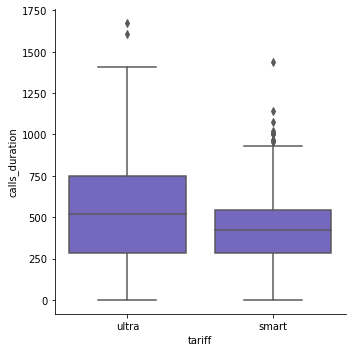

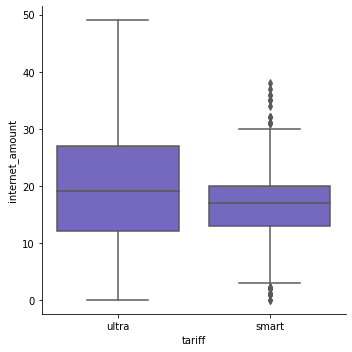

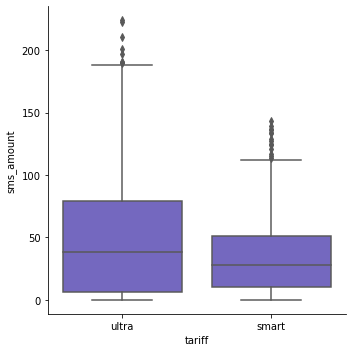

In [47]:
for column in ['calls_duration', 'internet_amount', 'sms_amount']:    
    sns.catplot(x="tariff", y=column, kind="box", data=total_data, color='slateblue')

Минуты/сообщения/трафик по тарифу «Ультра» имеют большую дисперсию по сравнению с тарифом «Смарт». Медианы на всех графиках также смещены в большую сторону. Стоит отметить, что выбросов на графиках дешевого тарифа существенно больше.

Посмотрим, как выглядят гистограммы для этих показателей:

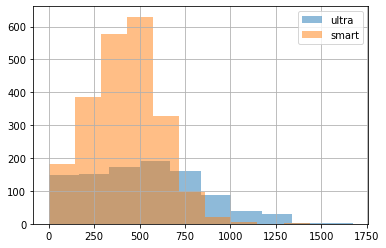

In [48]:
total_data.query('tariff == "ultra"')['calls_duration'].hist(alpha=0.5)
total_data.query('tariff == "smart"')['calls_duration'].hist(alpha=0.5)
plt.legend(['ultra', 'smart']);

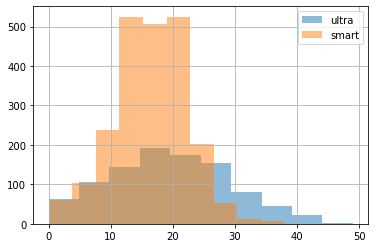

In [49]:
total_data.query('tariff == "ultra"')['internet_amount'].hist(alpha=0.5)
total_data.query('tariff == "smart"')['internet_amount'].hist(alpha=0.5)
plt.legend(['ultra', 'smart']);

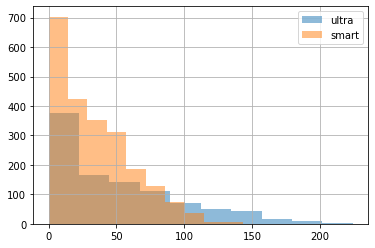

In [50]:
total_data.query('tariff == "ultra"')['sms_amount'].hist(alpha=0.5)
total_data.query('tariff == "smart"')['sms_amount'].hist(alpha=0.5)
plt.legend(['ultra', 'smart']);

**Выводы:**

Дисперсия для тарифа "Смарт" меньше, чем для тарифа "Ультра" по всем показателям: по длительности звонков, числу смс и интернет-трафику. 

Поведение пользователей тарифа "Ультра" более разнообразное с точки зрения потребления услуг. Возможно, более дорогой тариф помогает абонентам не беспокоиться о неожиданном отключении пакета минут/смс/интернета. Поэтому их потребительское поведение более свободно. 

## Проверка гипотез

### Первая пара гипотез

$H_0$  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

$H_1$ — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

α=5%

В пункте 3 нашего исследования можно увидеть, что дисперсии выручек сильно отличаются. Поэтому для проверки гипотез подойдет метод `scipy.stats.ttest_ind (array1, array2, equal_var = False)`.

In [51]:
display(total_data.revenue.isna().sum())
total_data.head()

2

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff,revenue
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1950.0
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1950.0
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1950.0
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1950.0


In [52]:
total_data = total_data.dropna(subset=['revenue']) #убираем пропуски, чтобы p-value не превратилось в nan из-за них

In [53]:
ultra = total_data.query('tariff == "ultra"')['revenue']
smart = total_data.query('tariff == "smart"')['revenue']

alpha = .05

results = st.ttest_ind(ultra, smart, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Действительно, если вернуться к таблице из пункта 3, можно увидеть, что средняя выручка пользователей тарифа "Смарт" составляет 1023 рубля, а средняя выручка пользователей тарифа "Ультра" — 1950 рублей. Получается, что пользователи более дешевого тарифа в среднем платят в два раза больше, т.к. у них раньше заканчиваются пакеты услуг. 

### Вторая пара гипотез

$H_0$  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

$H_1$ — средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

α=5%

In [54]:
# добавим наименование населенного пункта для каждого абонента
total_data = total_data.merge(users[['user_id','city']], on = 'user_id')

In [55]:
total_data

,user_id,month,calls_amount,calls_duration,sms_amount,internet_amount,tariff,revenue,city
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1950.0,Краснодар
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1950.0,Краснодар
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1950.0,Краснодар
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1950.0,Краснодар
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11.0,smart,550.0,Санкт-Петербург
3210,1489,9.0,0.0,0.0,32.0,17.0,smart,950.0,Санкт-Петербург
3211,1489,10.0,0.0,0.0,21.0,20.0,smart,1550.0,Санкт-Петербург
3212,1489,11.0,0.0,0.0,20.0,18.0,smart,1150.0,Санкт-Петербург


In [56]:
moscow = total_data[total_data['city'] == 'Москва']
other = total_data[total_data['city'] != 'Москва']

alpha = 0.05

results = st.ttest_ind(moscow['revenue'], other['revenue'], equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу о равенстве выручки в Москве и регионах.

In [57]:
def region_type(city): #проведем категоризацию городов с помощью функции
    if city == 'Москва': 
        return 'Москва'
    else: 
        return 'Другой регион'

In [58]:
total_data['region'] = total_data['city'].apply(region_type) #добавим столбец с типом региона
total_data.pivot_table(index='region', values='revenue', aggfunc='mean') #посмотрим выручку по регионам

,revenue
region,
Другой регион,1524.936227
Москва,1546.713584


## Общий вывод

В результате исследования удалось выяснить, что доходы от тарифа "Ультра" превышают доходы от тарифа "Смарт": 1950 руб. против 1023 руб. соответственно. 

В поведении пользователей можно выделить следующие особенности: 

- Пользователи тарифа «Смарт» вынуждены оплачивать пакеты услуг сверх абонентской платы, т.к. им не хватает включенных в тариф минут/смс/гигабайт. В итоге пользователи платят в два раза больше: 1023 руб вместо изначальных 550 руб. 
- Пользователи тарифа «Ультра» не используют пакеты услуг в полном объеме. 
- Разница между выручкой в Москве и других регионах оказалась незначительной, что не позволило нам отвергнуть гипотезу о равенстве выручек. 

Рекламному отделу стоит сосредоточиться на продвижении тарифа "Ультра". 